In [1]:
import os
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
life_expancy_data = pd.read_csv("./data_csv/cdc-life-expectancy.csv", index_col=0)
life_expancy_data.keys()

Index(['M', 'F'], dtype='object')

In [3]:
data_list = []
all_data = pd.DataFrame()
for f in glob.glob("./data_txt/*.txt"):
    df = pd.read_csv(f, sep=',', header=None)
    df["year"] = int(f[14:18])
    all_data = all_data.append(df, ignore_index=True)

all_data.columns = (["name", "sex", "number", "year"])
print(all_data)

              name sex  number  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1957041      Zylas   M       5  2018
1957042      Zyran   M       5  2018
1957043      Zyrie   M       5  2018
1957044      Zyron   M       5  2018
1957045      Zzyzx   M       5  2018

[1957046 rows x 4 columns]


In [5]:
#Most popular male name 2009-2018 is Noah
#Jacob second most popular name from 2009-2018. Michael on seventh place
data09_18 = all_data[all_data["year"] <= 2018 ]
data09_18 = data09_18[data09_18["year"] >= 2009]
data09_18 = data09_18.drop(columns = "year")
data09_18_M = data09_18[data09_18["sex"] == "M"]
data09_18_M = data09_18_M.groupby("name").sum()
data09_18_M = data09_18_M.sort_values(by='number', ascending=False)
print(data09_18_M.head(20))
data09_18_M.index[data09_18_M["number"].argmax()]

           number
name             
Noah       180904
Jacob      173195
William    163811
Liam       161558
Ethan      157359
Mason      156764
Michael    152983
Alexander  148711
Daniel     140504
James      140268
Elijah     135979
Aiden      135955
Jayden     135067
Benjamin   134249
Matthew    131472
Logan      130472
David      122765
Joseph     121045
Anthony    120451
Jackson    117903


'Noah'

In [6]:
#Most popular female name 2009-2018 is Emma
#Sophia and Sofia are similar names. If merged into one it would be the 
#most popular name in these years
data09_18_F = data09_18[data09_18["sex"] == "F"]
data09_18_F = data09_18_F.groupby("name").sum()
data09_18_F = data09_18_F.sort_values(by='number', ascending=False)
print(data09_18_F.head(20))
data09_18_F.index[data09_18_F["number"].argmax()]

           number
name             
Emma       195305
Sophia     183930
Olivia     183016
Isabella   179015
Ava        156852
Mia        127727
Emily      124501
Abigail    123643
Madison    107153
Elizabeth   96867
Charlotte   93231
Chloe       90602
Ella        87235
Amelia      85365
Evelyn      81972
Avery       81736
Sofia       80575
Addison     77043
Harper      76441
Grace       75040


'Emma'

In [7]:
#Total number of names in years and diff between Male and Female names 2009-2018
index_F = data09_18_F.index
num_of_rows_F = len(index_F)
index_M = data09_18_M.index
num_of_rows_M = len(index_M)
total_diff_of_names = num_of_rows_F - num_of_rows_M
total_num_of_names = num_of_rows_F + num_of_rows_M
print("Number of female names: ",num_of_rows_F, "and male names: ", num_of_rows_M)
print("Total number of names in the years 2009-2018: ", total_num_of_names)
print("Total difference in number of F/M names: ", total_diff_of_names)

Number of female names:  34967 and male names:  25604
Total number of names in the years 2009-2018:  60571
Total difference in number of F/M names:  9363


(3500000, 4148806.2)

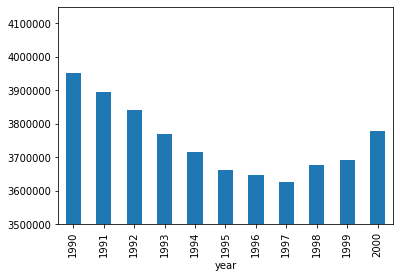

In [38]:
#Girls and boys born between 1990 and 2000
data90_00 = all_data[all_data["year"] <= 2000 ]
data90_00 = data90_00[data90_00["year"] >= 1990]
data90_00_F = data90_00[data90_00["sex"] == "F"]
data90_00_M = data90_00[data90_00["sex"] == "M"]
data90_00.groupby('year').number.sum().plot(kind='bar')
plt.ylim(3500000)

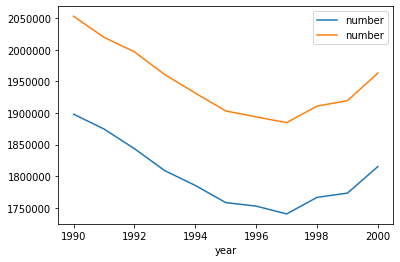

In [42]:
data90_00_F.groupby('year').number.sum().plot(kind='line')
data90_00_M.groupby('year').number.sum().plot(kind='line')
plt.legend()


In [9]:
data90_00 = data90_00.drop(columns = "year")
data90_00 = data90_00.groupby("sex").sum()
print("Total number of births in years 1990-2000")
print(data90_00)

Total number of births in years 1990-2000
       number
sex          
F    19816748
M    21437454


Female birth over the years: 
       number
year         
1957  2044311
1959  2023035
1960  2022010
1961  2017637
1958  2010963
...       ...
1884   129019
1883   112319
1882   107847
1881    91953
1880    90994

[139 rows x 1 columns]
Male birth over the years: 
       number
year         
1957  2155711
1959  2133306
1960  2132155
1961  2122664
1958  2120611
...       ...
1899   106210
1883   104625
1887   101412
1891   101191
1881   100743

[139 rows x 1 columns]


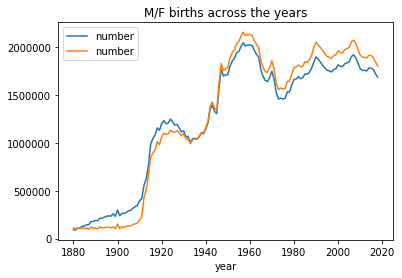

In [10]:
#Number of children born in all years
dataF = all_data[all_data["sex"] == "F"]
dataF.groupby('year').number.sum().plot(kind='line', legend = True, title = "M/F births across the years")
dataM = all_data[all_data["sex"] == "M"]
dataM.groupby('year').number.sum().plot(kind='line', legend = True)
#dataF = dataF.groupby(["year", "sex"])
#print(dataF.get_group((1997, "F")))
#print(dataF.get_group((1997, "M")))
#num_of_births_F = pd.merge(dataF.get_group((1997, "F")), dataF.get_group((1997, "M")), on=['year'])
# print(dataF.get_group(1880).groupby("sex").get_group("F"))
dataF = dataF.groupby("year").sum()
dataF = dataF.sort_values(by="number", ascending = False)
dataM = dataM.groupby("year").sum()
dataM = dataM.sort_values(by="number", ascending = False)
print("Female birth over the years: ")
print(dataF)
print("Male birth over the years: ")
print(dataM)
#increase in child births after both wars
#Baby boom 60's

In [26]:
#Only one female name in ten most popular names from all dataset
#Michael on 4 place
most_pop_name_all = all_data
most_pop_name_all = most_pop_name_all.drop(columns = "year")
most_pop_name_all = most_pop_name_all.groupby("name").sum()
most_pop_name_all = most_pop_name_all.sort_values(by='number', ascending=False)
print(most_pop_name_all.head(10))

          number
name            
James    5187679
John     5146508
Robert   4840228
Michael  4384463
Mary     4140840
William  4133327
David    3634229
Joseph   2623958
Richard  2574832
Charles  2405197


In [23]:
num_of_births_F = pd.merge(dataF, life_expancy_data, on=['year'])
num_of_births_F = num_of_births_F.drop(columns="M")
num_of_births_F = num_of_births_F.drop(columns="number")
num_of_births_F = num_of_births_F.sort_values(by="year", ascending=False)
print("10 highest life expancies for Females")
print(num_of_births_F.head(10))
print("10 lowest life expancies for Females")
print(num_of_births_F.tail(10))

10 highest life expancies for Females
       F
year    
2012  81
2011  81
2010  81
2009  80
2008  80
2007  80
2006  80
2005  80
2004  80
2003  80
10 lowest life expancies for Females
       F
year    
1939  64
1938  64
1937  64
1936  64
1935  64
1934  62
1933  62
1932  62
1931  62
1930  62


In [24]:
num_of_births_M = pd.merge(dataM, life_expancy_data, on=['year'])
num_of_births_M = num_of_births_M.drop(columns="F")
num_of_births_M = num_of_births_M.drop(columns="number")
num_of_births_M = num_of_births_M.sort_values(by="year", ascending=False)
print("10 highest life expancies for Males")
print(num_of_births_M.head(10))
print("10 lowest life expancies for Males")
print(num_of_births_M.tail(10))

10 highest life expancies for Males
       M
year    
2012  76
2011  76
2010  76
2009  75
2008  75
2007  75
2006  75
2005  75
2004  75
2003  75
10 lowest life expancies for Males
       M
year    
1939  60
1938  60
1937  60
1936  60
1935  60
1934  58
1933  58
1932  58
1931  58
1930  58


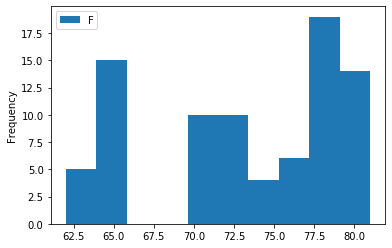

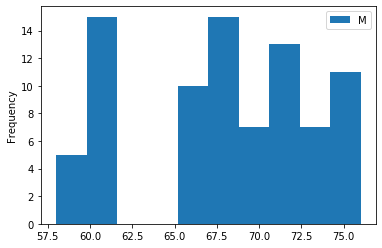

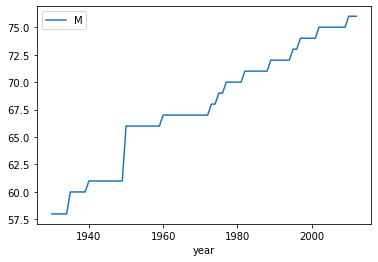

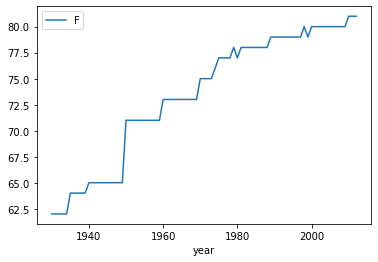

In [25]:
num_of_births_F.plot(kind='hist')
num_of_births_M.plot(kind='hist')
num_of_births_M.plot(kind='line')
num_of_births_F.plot(kind='line')

In [14]:
Jakub = all_data[all_data["name"] == "Jakub"]
print(Jakub)
Jakub = Jakub[Jakub["year"] == 1997]
print(Jakub)

          name sex  number  year
902176   Jakub   M       5  1981
939669   Jakub   M       7  1983
999345   Jakub   M       8  1986
1021806  Jakub   M       6  1987
1041976  Jakub   M      10  1988
1088963  Jakub   M      14  1990
1114752  Jakub   M      11  1991
1137430  Jakub   M      32  1992
1162946  Jakub   M      35  1993
1188546  Jakub   M      44  1994
1214485  Jakub   M      47  1995
1240649  Jakub   M      51  1996
1267103  Jakub   M      66  1997
1294306  Jakub   M      88  1998
1322736  Jakub   M      73  1999
1352033  Jakub   M      76  2000
1381701  Jakub   M     121  2001
1412081  Jakub   M     125  2002
1443057  Jakub   M     122  2003
1474492  Jakub   M     151  2004
1507016  Jakub   M     135  2005
1540322  Jakub   M     168  2006
1574929  Jakub   M     174  2007
1609748  Jakub   M     184  2008
1644748  Jakub   M     145  2009
1679063  Jakub   M     147  2010
1713187  Jakub   M     106  2011
1747044  Jakub   M     106  2012
1780601  Jakub   M      97  2013
1813872  J

In [15]:
Michal = all_data[all_data["name"] == "Michal"]
print(Michal)
Michal = Michal[Michal["year"] == 1997]
Michal = Michal[Michal["sex"] == "M"]
print(Michal)

           name sex  number  year
98358    Michal   M       5  1911
104066   Michal   M       7  1912
111604   Michal   M       5  1913
118176   Michal   M      10  1914
128384   Michal   M       6  1915
...         ...  ..     ...   ...
1882814  Michal   M      22  2016
1895690  Michal   F      49  2017
1917746  Michal   M      12  2017
1929038  Michal   F      36  2018
1948706  Michal   M      16  2018

[175 rows x 4 columns]
           name sex  number  year
1267245  Michal   M      58  1997


In [16]:
#Highest popularity in the end of millenium
Jacob = all_data[all_data["name"] == "Jacob"]
JacobF = Jacob[Jacob["sex"] =="F"]
JacobM = Jacob[Jacob["sex"] == "M"]
Jacob = Jacob.sort_values(by="number", ascending=False)
print(Jacob.head(20))
#First use of the name Jacob in this dataset
Jacob_first_use = Jacob.sort_values(by="year", ascending=True)
print(Jacob_first_use.head(1))

          name sex  number  year
1292956  Jacob   M   36016  1998
1321201  Jacob   M   35363  1999
1350465  Jacob   M   34477  2000
1265546  Jacob   M   34153  1997
1380555  Jacob   M   32545  2001
1238856  Jacob   M   31925  1996
1212639  Jacob   M   31129  1995
1410938  Jacob   M   30574  2002
1441851  Jacob   M   29638  2003
1186644  Jacob   M   29412  1994
1473433  Jacob   M   27881  2004
1160725  Jacob   M   27484  1993
1505836  Jacob   M   25833  2005
1135118  Jacob   M   25661  1992
1109862  Jacob   M   25193  1991
1539255  Jacob   M   24845  2006
1573858  Jacob   M   24282  2007
1608715  Jacob   M   22594  2008
1677854  Jacob   M   22127  2010
1084919  Jacob   M   22009  1990
      name sex  number  year
980  Jacob   M     404  1880


In [17]:
#Highest popularity int the 60'
#Funfact: Michael Jackson was born in 1958 in the top years of these name
Michael = all_data[all_data["name"] == "Michael"]
MichaelF = Michael[Michael["sex"] =="F"]
MichaelM = Michael[Michael["sex"] == "M"]
Michael = Michael.sort_values(by="number", ascending=False)
print(Michael.head(20))
#First use of the name Michael in this dataset
Michael_first_use = Michael.sort_values(by="year", ascending=True)
print(Michael_first_use.head(1))

           name sex  number  year
544630  Michael   M   92704  1957
533165  Michael   M   90656  1956
556204  Michael   M   90517  1958
510812  Michael   M   88528  1954
521887  Michael   M   88327  1955
591921  Michael   M   86917  1961
705996  Michael   M   85302  1970
567899  Michael   M   85251  1959
691606  Michael   M   85203  1969
604159  Michael   M   85034  1962
499859  Michael   M   84226  1953
579803  Michael   M   84180  1960
616446  Michael   M   83782  1963
628869  Michael   M   82646  1964
665414  Michael   M   82436  1967
678156  Michael   M   82008  1968
640994  Michael   M   81021  1965
653029  Michael   M   79990  1966
489105  Michael   M   79049  1952
721066  Michael   M   77594  1971
        name sex  number  year
987  Michael   M     354  1880


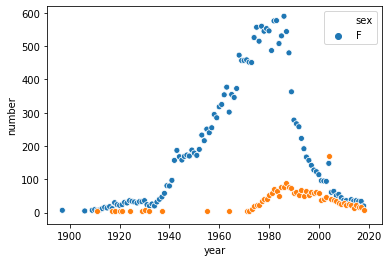

In [18]:
sns.scatterplot(x="year",y="number", hue = "sex", data=MichaelF)
sns.scatterplot(x="year",y="number", data=JacobF)

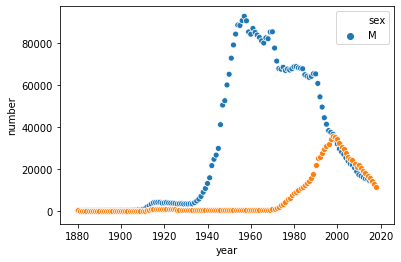

In [19]:
sns.scatterplot(x="year",y="number", hue = "sex", data=MichaelM)
sns.scatterplot(x="year",y="number", data=JacobM)

In [20]:
#Difference between popularity of both names
Jacobsum = Jacob.drop(columns = "year")
Jacobsum = Jacobsum.groupby("name").sum()
Michaelsum = Michael.drop(columns = "year")
Michaelsum = Michaelsum.groupby("name").sum()
print([Jacobsum, Michaelsum])

[       number
name         
Jacob  933726,           number
name            
Michael  4384463]
